### Author: Mitchell Krystofiak
### Class: COSC 311 - Lab3
### Date: October 29, 2021
### Description: Iris Flower Measurements, CIs, SEs, Means, Scatters, Bar Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import stats
import math

In [2]:
#Read in iris.data

iris = pd.read_csv('./iris.data',header=None, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Class'])
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


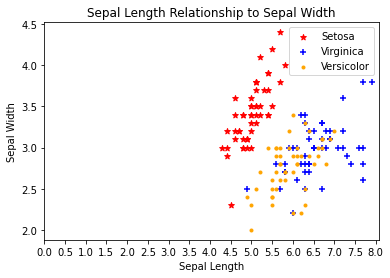

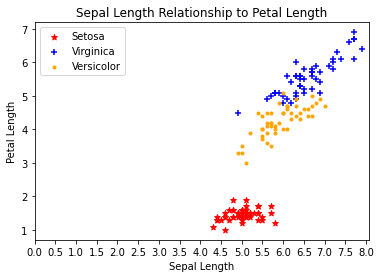

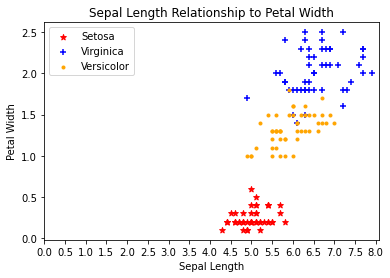

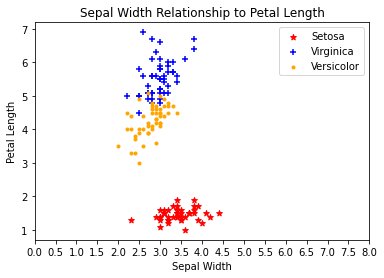

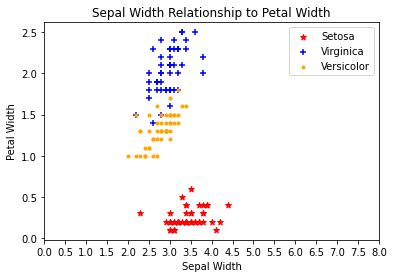

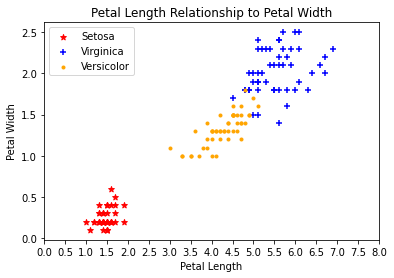

<Figure size 432x288 with 0 Axes>

In [3]:
#Iris Data pairs scattered by class

setosa = iris[iris['Class'] == 'Iris-setosa']
virginica = iris[iris['Class'] == 'Iris-virginica']
versicolor = iris[iris['Class'] == 'Iris-versicolor']

for i in range(4):
    plt.clf()
    for j in range(i+1,4):
        plt.scatter(x=setosa[setosa.columns[i]], y=setosa[setosa.columns[j]], color='red', marker='*')
        plt.scatter(x=virginica[virginica.columns[i]], y=virginica[virginica.columns[j]], color='blue', marker='+')
        plt.scatter(x=versicolor[versicolor.columns[i]], y=versicolor[versicolor.columns[j]], color='orange', marker='.')
        plt.legend(['Setosa','Virginica','Versicolor'])
        plt.xlabel(setosa.columns[i])
        plt.ylabel(setosa.columns[j])
        plt.title(f'{setosa.columns[i]} Relationship to {setosa.columns[j]}')
        plt.xticks(np.arange(0,8.5,0.5))
        plt.show()

In [4]:
#Calculate Correlation Coefficients without class considerations

corr_co = []
for i in range(4):
    for j in range(i+1,4):
        corr_co.append({"Data":f"{iris.columns[i]} to {iris.columns[j]}", "Corr_Co":iris[iris.columns[i]].corr(iris[iris.columns[j]])})
        
corr_co

[{'Data': 'Sepal Length to Sepal Width', 'Corr_Co': -0.10936924995064937},
 {'Data': 'Sepal Length to Petal Length', 'Corr_Co': 0.8717541573048718},
 {'Data': 'Sepal Length to Petal Width', 'Corr_Co': 0.8179536333691636},
 {'Data': 'Sepal Width to Petal Length', 'Corr_Co': -0.42051609640115445},
 {'Data': 'Sepal Width to Petal Width', 'Corr_Co': -0.35654408961380535},
 {'Data': 'Petal Length to Petal Width', 'Corr_Co': 0.9627570970509663}]

In [5]:
#Correlation coefficients with respect to class

set_corr_co = []
vir_corr_co = []
ver_corr_co = []

for i in range(4):
    for j in range(i+1,4):
        set_corr_co.append({"Setosa Data": f"{setosa.columns[i]} to {setosa.columns[j]}",
                            "Correlation_Co": setosa[setosa.columns[i]].corr(setosa[setosa.columns[j]])})
        vir_corr_co.append({"Virginica Data": f"{virginica.columns[i]} to {virginica.columns[j]}",
                            "Correlation_Co": virginica[virginica.columns[i]].corr(virginica[virginica.columns[j]])})
        ver_corr_co.append({"Versicolor Data": f"{versicolor.columns[i]} to {versicolor.columns[j]}",
                            "Correlation_Co": versicolor[versicolor.columns[i]].corr(versicolor[versicolor.columns[j]])})
set_corr_co

[{'Setosa Data': 'Sepal Length to Sepal Width',
  'Correlation_Co': 0.7467803732639267},
 {'Setosa Data': 'Sepal Length to Petal Length',
  'Correlation_Co': 0.2638740929186868},
 {'Setosa Data': 'Sepal Length to Petal Width',
  'Correlation_Co': 0.27909157499959697},
 {'Setosa Data': 'Sepal Width to Petal Length',
  'Correlation_Co': 0.17669462869680694},
 {'Setosa Data': 'Sepal Width to Petal Width',
  'Correlation_Co': 0.27997288851690466},
 {'Setosa Data': 'Petal Length to Petal Width',
  'Correlation_Co': 0.30630821115803575}]

In [6]:
vir_corr_co

[{'Virginica Data': 'Sepal Length to Sepal Width',
  'Correlation_Co': 0.4572278163941129},
 {'Virginica Data': 'Sepal Length to Petal Length',
  'Correlation_Co': 0.8642247329355764},
 {'Virginica Data': 'Sepal Length to Petal Width',
  'Correlation_Co': 0.28110770915731925},
 {'Virginica Data': 'Sepal Width to Petal Length',
  'Correlation_Co': 0.4010445773427854},
 {'Virginica Data': 'Sepal Width to Petal Width',
  'Correlation_Co': 0.5377280262661887},
 {'Virginica Data': 'Petal Length to Petal Width',
  'Correlation_Co': 0.3221082159003183}]

In [7]:
ver_corr_co

[{'Versicolor Data': 'Sepal Length to Sepal Width',
  'Correlation_Co': 0.5259107172828243},
 {'Versicolor Data': 'Sepal Length to Petal Length',
  'Correlation_Co': 0.754048958592016},
 {'Versicolor Data': 'Sepal Length to Petal Width',
  'Correlation_Co': 0.5464610715986299},
 {'Versicolor Data': 'Sepal Width to Petal Length',
  'Correlation_Co': 0.560522091692982},
 {'Versicolor Data': 'Sepal Width to Petal Width',
  'Correlation_Co': 0.6639987200241115},
 {'Versicolor Data': 'Petal Length to Petal Width',
  'Correlation_Co': 0.7866680885228169}]

In [8]:
#Computer mean of the 4 numerical categories with 95% confidence intervals (no class)
#Some notes: mean x_bar, SE = std(x_bar) = sqrt(var(x_bar)) = sigma_X/sqrt(N)
# Confidence Intervals: [x_bar - 1.96*SE, x_bar + 1.96*SE]

#Grab SE and xbar

xbar = []
SE = []

for i in range(4):
    xbar.append({"Data":iris.columns[i],"mean":np.mean(iris[iris.columns[i]])})
    SE.append({"Data":iris.columns[i],"SE": np.std(iris[iris.columns[i]])/np.sqrt(len(iris[iris.columns[i]]))})

In [9]:
xbar

[{'Data': 'Sepal Length', 'mean': 5.843333333333335},
 {'Data': 'Sepal Width', 'mean': 3.0540000000000007},
 {'Data': 'Petal Length', 'mean': 3.7586666666666693},
 {'Data': 'Petal Width', 'mean': 1.1986666666666672}]

In [10]:
SE

[{'Data': 'Sepal Length', 'SE': 0.06738556829778031},
 {'Data': 'Sepal Width', 'SE': 0.03528462050872086},
 {'Data': 'Petal Length', 'SE': 0.1435833065712233},
 {'Data': 'Petal Width', 'SE': 0.0621037602487727}]

In [11]:
# build confidence intervals

CI = []

for i in range(4):
    CI.append({"Data":iris.columns[i], 
               "CI": (f"({xbar[i]['mean'] - 1.96*SE[i]['SE']} , {xbar[i]['mean'] + 1.96*SE[i]['SE']})")})
CI

[{'Data': 'Sepal Length', 'CI': '(5.711257619469685 , 5.975409047196984)'},
 {'Data': 'Sepal Width', 'CI': '(2.984842143802908 , 3.1231578561970936)'},
 {'Data': 'Petal Length', 'CI': '(3.4772433857870717 , 4.040089947546267)'},
 {'Data': 'Petal Width', 'CI': '(1.0769432965790728 , 1.3203900367542616)'}]

In [12]:
#Find xbar and SE for each class.

set_xbar = []
vir_xbar = []
ver_xbar = []
set_SE = []
vir_SE = []
ver_SE = []

for i in range(4):
    set_xbar.append(np.mean(setosa[setosa.columns[i]]))
    set_SE.append(np.std(setosa[setosa.columns[i]])/np.sqrt(len(setosa[setosa.columns[i]])))
    vir_xbar.append(np.mean(virginica[virginica.columns[i]]))
    vir_SE.append(np.std(virginica[virginica.columns[i]])/np.sqrt(len(virginica[virginica.columns[i]])))
    ver_xbar.append(np.mean(versicolor[versicolor.columns[i]]))
    ver_SE.append(np.std(versicolor[versicolor.columns[i]])/np.sqrt(len(versicolor[versicolor.columns[i]])))


In [13]:
d = [set_xbar, vir_xbar, ver_xbar]
Mean_Data = pd.DataFrame(d, index=['Setosa','Virginica','Versicolor'], 
             columns=['Sepal Length Mean','Sepal Width Mean','Petal Length Mean','Petal Width Mean'])
Mean_Data

,Sepal Length Mean,Sepal Width Mean,Petal Length Mean,Petal Width Mean
Setosa,5.006,3.418,1.464,0.244
Virginica,6.588,2.974,5.552,2.026
Versicolor,5.936,2.770,4.260,1.326


In [14]:
d = [set_SE, vir_SE, ver_SE]
SE_Data = pd.DataFrame(d, index=['Setosa','Virginica','Versicolor'], 
             columns=['Sepal Length SE','Sepal Width SE','Petal Length SE','Petal Width SE'])
SE_Data

,Sepal Length SE,Sepal Width SE,Petal Length SE,Petal Width SE
Setosa,0.049349,0.053343,0.024292,0.015009
Virginica,0.089023,0.045150,0.077265,0.038451
Versicolor,0.072264,0.043932,0.065788,0.027685


In [15]:
# build confidence intervals for each class measurement

set_CI = []
vir_CI = []
ver_CI = []

for i in range(4):
    set_CI.append((set_xbar[i] - 1.96*set_SE[i], set_xbar[i] + 1.96*set_SE[i]))
    vir_CI.append((vir_xbar[i] - 1.96*vir_SE[i], vir_xbar[i] + 1.96*vir_SE[i]))
    ver_CI.append((ver_xbar[i] - 1.96*ver_SE[i], ver_xbar[i] + 1.96*ver_SE[i]))

In [16]:
d = [set_CI, vir_CI, ver_CI]
CI_Data = pd.DataFrame(d, index=['Setosa','Virginica','Versicolor'], 
             columns=['Sepal Length CI','Sepal Width CI', 'Petal Length CI', 'Petal Width CI'])

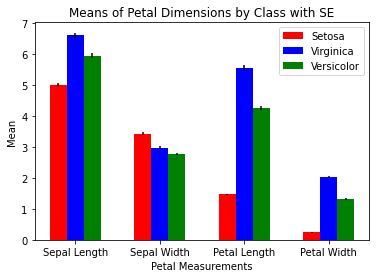

In [17]:
labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
x = np.arange(4)
width = 0.2
plt.bar(x-0.2, Mean_Data.iloc[0].values, width, yerr=SE_Data.iloc[0].values, color='red')
plt.bar(x, Mean_Data.iloc[1].values, width, yerr=SE_Data.iloc[1].values, color='blue')
plt.bar(x+0.2, Mean_Data.iloc[2].values, width, yerr=SE_Data.iloc[2].values, color='green')
plt.xticks(x, labels)
plt.title("Means of Petal Dimensions by Class with SE")
plt.xlabel("Petal Measurements")
plt.ylabel("Mean")
plt.legend(['Setosa','Virginica','Versicolor'])

### Hypothesis: The Mean of Setosa Petal Length is equivalent to the Mean of Versicolor Petal Width
- Null Hypothesis: H0: Setosa_PL_mu  = Versicolor_PW_mu
- Alternate Hypot: HA: Setosa_PL_mu != Versicolor_PW_mu

In [18]:
m1 = Mean_Data['Petal Length Mean']['Setosa']

In [19]:
m2 = Mean_Data['Petal Width Mean']['Versicolor']

In [20]:
v1 = np.var(setosa['Petal Length'])

In [21]:
v2 = np.var(versicolor['Petal Width'])

In [22]:
def ab_statistic(u1, v1, u2, v2):
    return (u1 - u2)/math.sqrt(v1**2 + v2**2)

In [23]:
z = ab_statistic(m1,v1,m2,v2)

In [28]:
p_value = stats.two_sided_p_value(z, 0, 1) # mean = 0, std = 1
p_value

0.004327081279067446

#### Since our p-value = 0.004 < 0.05, we reject the Null Hyptothesis --> the Mean of Setosa Petal Lengths are NOT equal to the Mean of Versicolor Petal Widths.

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64), array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))


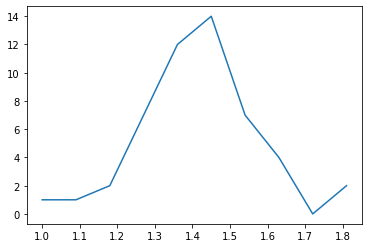

In [90]:
hist = np.histogram(setosa['Petal Length'], bins=10)
print(hist)
plt.plot(hist[1][:-1], hist[0])

<BarContainer object of 10 artists>

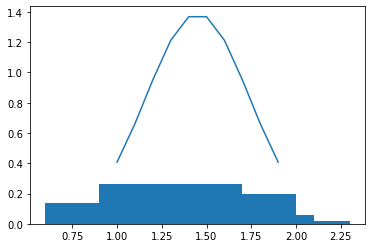

In [98]:
# plt.bar([x for x in counts.keys()], [v /setosa['Petal Length'].count() for v in counts.values()])
ys = hist[0]/setosa['Petal Length'].count()
xs = np.arange(1,2,0.1)
plt.plot(xs, [stats.normal_pdf(x,np.mean(xs),np.std(xs)) for x in xs])
plt.bar(xs, ys)

<BarContainer object of 10 artists>

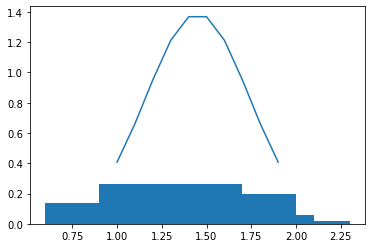

In [100]:
hist = np.histogram(versicolor['Petal Width'], bins=10)
ys = hist[0]/versicolor['Petal Width'].count()
xs = np.arange(1,2,0.1)
plt.plot(xs, [stats.normal_pdf(x,np.mean(xs),np.std(xs)) for x in xs])
plt.bar(xs,ys)

Judging by the histrograms, we are getting a semi normal distribution so yeah. This is wack. Happy halloween! Gauss Jordan time.